# Understanding Backpropagation: A Step-by-Step Guide

This notebook provides an intuitive explanation of backpropagation using the micrograd library. We'll build up from basic principles to understand how neural networks learn.


## 1. Analyzing micrograd

Inside the micrograd directory, engine.py and nn.py contain classes and functions we will use to understand a simple example of backpropagation.


## 2. Understanding Automatic Differentiation

Let's start by importing the `Value` class from micrograd's engine.py. This is the core component that enables automatic differentiation.


In [12]:
from micrograd.engine import Value

# Create a simple value
a = Value(3.0)
b = Value(2.0)
print(f"a = {a}")
print(f"b = {b}")

a = Value(data=3.0, grad=0)
b = Value(data=2.0, grad=0)


### 2.1 Forward Pass

Let's perform a simple computation: $c = a + b$, $d = c * 2$, and then compute the final output $L = d^2$.

This corresponds to the following computational graph:

```
a(3.0) -->
           +c(5.0) --> *d(10.0) --> **2 --> L(100.0)
b(2.0) -->
```


In [13]:
# Forward pass
c = a + b    # c = 5.0
d = c * 2    # d = 10.0
L = d ** 2   # L = 100.0

print(f"c = a + b = {c}")
print(f"d = c * 2 = {d}")
print(f"L = d ** 2 = {L}")

c = a + b = Value(data=5.0, grad=0)
d = c * 2 = Value(data=10.0, grad=0)
L = d ** 2 = Value(data=100.0, grad=0)


### 2.2 Backward Pass (Backpropagation)

Now let's compute the gradients using backpropagation. This is where the magic happens!

**Key Concept**: The gradient tells us how much a small change in a parameter would affect the final output.

We'll calculate $\frac{\partial L}{\partial a}$ and $\frac{\partial L}{\partial b}$.


In [14]:
# Backward pass
L.backward()

print(f"a.grad = ∂L/∂a = {a.grad}")
print(f"b.grad = ∂L/∂b = {b.grad}")
print(f"c.grad = ∂L/∂c = {c.grad}")
print(f"d.grad = ∂L/∂d = {d.grad}")

a.grad = ∂L/∂a = 40.0
b.grad = ∂L/∂b = 40.0
c.grad = ∂L/∂c = 40.0
d.grad = ∂L/∂d = 20.0


### 2.3 Understanding the Gradients

Let's trace through how these gradients are computed using the chain rule:

1. First, $\frac{\partial L}{\partial L} = 1$ (gradient of output with respect to itself is 1)
2. $\frac{\partial L}{\partial d} = \frac{\partial}{\partial d}(d^2) = 2d = 2 \cdot 10 = 20$
3. $\frac{\partial L}{\partial c} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial c} = 20 \cdot 2 = 40$
4. $\frac{\partial L}{\partial a} = \frac{\partial L}{\partial c} \cdot \frac{\partial c}{\partial a} = 40 \cdot 1 = 40$
5. $\frac{\partial L}{\partial b} = \frac{\partial L}{\partial c} \cdot \frac{\partial c}{\partial b} = 40 \cdot 1 = 40$

Let's verify this manually:


In [15]:
# Manual calculation for verification
h = 0.001  # small increment

# Calculate ∂L/∂a using finite difference method
a_plus_h = Value(a.data + h)
c_new = a_plus_h + b
d_new = c_new * 2
L_new = d_new ** 2
dL_da_numerical = (L_new.data - L.data) / h

print(f"Numerical ∂L/∂a: {dL_da_numerical}")
print(f"Analytical ∂L/∂a: {a.grad}")
print(f"Difference: {abs(dL_da_numerical - a.grad)}")

Numerical ∂L/∂a: 40.00399999998194
Analytical ∂L/∂a: 40.0
Difference: 0.003999999981942892


## 3. A More Complex Example

Let's try a slightly more complex computational graph with multiple operations and branches.

We'll compute: $L = (a * b + c) * (c - a)$


In [16]:
# Reset values
a = Value(2.0)
b = Value(3.0)
c = Value(4.0)

# Forward pass
e = a * b     # e = 6.0
f = e + c     # f = 10.0
g = c - a     # g = 2.0
L = f * g     # L = 20.0

print(f"e = a * b = {e}")
print(f"f = e + c = {f}")
print(f"g = c - a = {g}")
print(f"L = f * g = {L}")

# Backward pass
L.backward()

print("\nGradients:")
print(f"a.grad = ∂L/∂a = {a.grad}")
print(f"b.grad = ∂L/∂b = {b.grad}")
print(f"c.grad = ∂L/∂c = {c.grad}")

e = a * b = Value(data=6.0, grad=0)
f = e + c = Value(data=10.0, grad=0)
g = c - a = Value(data=2.0, grad=0)
L = f * g = Value(data=20.0, grad=0)

Gradients:
a.grad = ∂L/∂a = -4.0
b.grad = ∂L/∂b = 4.0
c.grad = ∂L/∂c = 12.0


### 3.1 Understanding the Complex Gradients

Let's trace through the chain rule calculations for this example:

For $\frac{\partial L}{\partial a}$, we need to consider two paths that a affects L:

- Path 1: $a \rightarrow e \rightarrow f \rightarrow L$
- Path 2: $a \rightarrow g \rightarrow L$

For $\frac{\partial L}{\partial c}$, we also have two paths:

- Path 1: $c \rightarrow f \rightarrow L$
- Path 2: $c \rightarrow g \rightarrow L$

Let's break down these calculations step by step:


In [17]:
# Detailed breakdown of gradient calculations
print("Gradient Calculation for L = (a*b + c) * (c - a)")
print("----------------------------------------------------")

# Calculate ∂L/∂f and ∂L/∂g
dL_df = g.data   # ∂L/∂f = g
dL_dg = f.data   # ∂L/∂g = f
print(f"∂L/∂f = g = {dL_df}")
print(f"∂L/∂g = f = {dL_dg}")

# Calculate ∂L/∂e and ∂L/∂c (first part)
dL_de = dL_df * 1   # ∂L/∂e = ∂L/∂f * ∂f/∂e = ∂L/∂f * 1
dL_dc_via_f = dL_df * 1  # ∂L/∂c via f = ∂L/∂f * ∂f/∂c = ∂L/∂f * 1
print(f"∂L/∂e = ∂L/∂f * ∂f/∂e = {dL_de}")
print(f"∂L/∂c via f = ∂L/∂f * ∂f/∂c = {dL_dc_via_f}")

# Calculate ∂L/∂a (via g) and ∂L/∂c (second part)
dL_da_via_g = dL_dg * (-1)  # ∂L/∂a via g = ∂L/∂g * ∂g/∂a = ∂L/∂g * (-1)
dL_dc_via_g = dL_dg * 1      # ∂L/∂c via g = ∂L/∂g * ∂g/∂c = ∂L/∂g * 1
print(f"∂L/∂a via g = ∂L/∂g * ∂g/∂a = {dL_da_via_g}")
print(f"∂L/∂c via g = ∂L/∂g * ∂g/∂c = {dL_dc_via_g}")

# Calculate ∂L/∂a (via e) and ∂L/∂b
dL_da_via_e = dL_de * b.data  # ∂L/∂a via e = ∂L/∂e * ∂e/∂a = ∂L/∂e * b
dL_db = dL_de * a.data        # ∂L/∂b = ∂L/∂e * ∂e/∂b = ∂L/∂e * a
print(f"∂L/∂a via e = ∂L/∂e * ∂e/∂a = {dL_da_via_e}")
print(f"∂L/∂b = ∂L/∂e * ∂e/∂b = {dL_db}")

# Total gradients (summing paths)
dL_da_total = dL_da_via_e + dL_da_via_g
dL_dc_total = dL_dc_via_f + dL_dc_via_g
print("\nFinal Gradients:")
print(f"∂L/∂a = ∂L/∂a via e + ∂L/∂a via g = {dL_da_total}")
print(f"∂L/∂b = {dL_db}")
print(f"∂L/∂c = ∂L/∂c via f + ∂L/∂c via g = {dL_dc_total}")

# Compare with micrograd's automatic differentiation
print("\nCompare with micrograd:")
print(f"micrograd ∂L/∂a = {a.grad}")
print(f"micrograd ∂L/∂b = {b.grad}")
print(f"micrograd ∂L/∂c = {c.grad}")

Gradient Calculation for L = (a*b + c) * (c - a)
----------------------------------------------------
∂L/∂f = g = 2.0
∂L/∂g = f = 10.0
∂L/∂e = ∂L/∂f * ∂f/∂e = 2.0
∂L/∂c via f = ∂L/∂f * ∂f/∂c = 2.0
∂L/∂a via g = ∂L/∂g * ∂g/∂a = -10.0
∂L/∂c via g = ∂L/∂g * ∂g/∂c = 10.0
∂L/∂a via e = ∂L/∂e * ∂e/∂a = 6.0
∂L/∂b = ∂L/∂e * ∂e/∂b = 4.0

Final Gradients:
∂L/∂a = ∂L/∂a via e + ∂L/∂a via g = -4.0
∂L/∂b = 4.0
∂L/∂c = ∂L/∂c via f + ∂L/∂c via g = 12.0

Compare with micrograd:
micrograd ∂L/∂a = -4.0
micrograd ∂L/∂b = 4.0
micrograd ∂L/∂c = 12.0


## 4. Neural Network Training with Backpropagation

Now let's see how backpropagation is used in neural network training. We'll create a simple neural network with micrograd's nn module.


In [18]:
from micrograd.nn import MLP

# Create a simple dataset: XOR problem
X = [
    [0, 0],  # Input 1
    [0, 1],  # Input 2
    [1, 0],  # Input 3
    [1, 1],  # Input 4
]
y = [0, 1, 1, 0]  # XOR outputs

# Create inputs and targets as Value objects
inputs = [[Value(x) for x in sample] for sample in X]
targets = [Value(y_i) for y_i in y]

# Create a neural network: 2-input, 3-hidden nodes, 1-output
model = MLP(2, [3, 1])  # 2 inputs, 3 hidden neurons, 1 output
print(model)

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [LinearNeuron(3)]]


### 4.1 Training Loop

Let's train our neural network using gradient descent. This involves:

1. Forward pass to compute predictions
2. Calculate loss
3. Backward pass to compute gradients
4. Update weights (parameters) using gradients


In [19]:
# Training loop
learning_rate = 0.05
epochs = 100

losses = []

for epoch in range(epochs):
    # Forward pass
    ypred = [model(x) for x in inputs]  # predictions
    loss = sum((yout - ytrue)**2 for yout, ytrue in zip(ypred, targets))  # MSE loss
    
    # Backward pass
    model.zero_grad()  # Reset gradients to zero
    loss.backward()    # Compute gradients
    
    # Update weights using gradient descent
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    # Record loss
    losses.append(loss.data)
    
    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.data:.4f}")

print(f"Final loss: {losses[-1]:.4f}")

Epoch 0, Loss: 2.0428
Epoch 10, Loss: 1.0533
Epoch 20, Loss: 0.9024
Epoch 30, Loss: 0.7590
Epoch 40, Loss: 0.6164
Epoch 50, Loss: 0.4918
Epoch 60, Loss: 0.3913
Epoch 70, Loss: 0.2963
Epoch 80, Loss: 0.1793
Epoch 90, Loss: 0.2132
Final loss: 0.0979


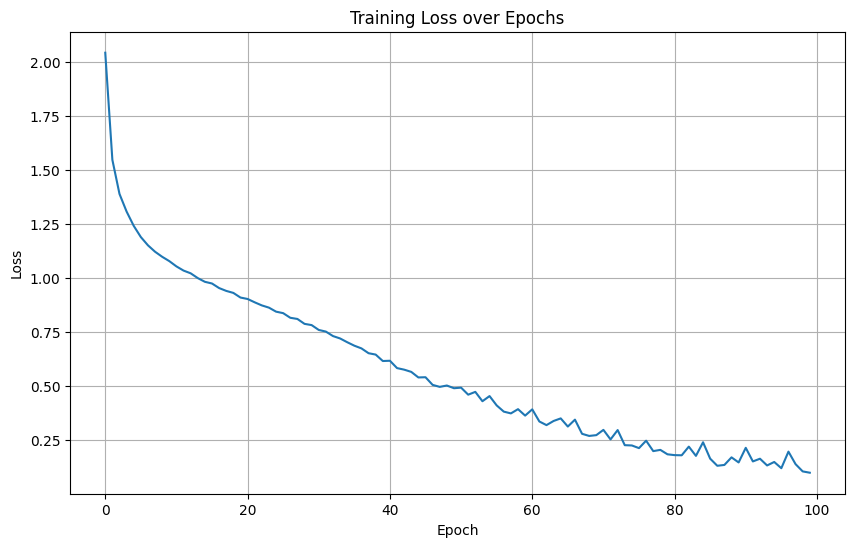

In [20]:
# Plot training loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

### 4.2 Evaluating the Trained Model

Now let's evaluate our trained model on the XOR problem:


In [21]:
# Evaluate the model
print("XOR Truth Table Predictions:")
print("-------------------------")
print("x1 | x2 | Target | Prediction")
print("-------------------------")

for i, x in enumerate(inputs):
    pred = model(x).data
    print(f"{X[i][0]}  | {X[i][1]}  | {y[i]}      | {pred:.4f}")

XOR Truth Table Predictions:
-------------------------
x1 | x2 | Target | Prediction
-------------------------
0  | 0  | 0      | 0.2265
0  | 1  | 1      | 0.9454
1  | 0  | 1      | 0.9518
1  | 1  | 0      | 0.3206


## 5. Visualizing the Computational Graph

Let's create a simple function to visualize a computational graph. We'll use a very basic text-based representation for now.


In [22]:
def trace_graph(node, indent=0, visited=None):
    if visited is None:
        visited = set()
    
    if node in visited:
        return
    
    visited.add(node)
    
    # Print current node
    indent_str = "  " * indent
    op_str = f" (op: {node._op})" if node._op else ""
    print(f"{indent_str}Value(data={node.data}, grad={node.grad}){op_str}")
    
    # Recursively print children
    for child in node._prev:
        trace_graph(child, indent + 1, visited)

# Let's create a simple expression
x = Value(2.0)
y = Value(3.0)
z = x * y + x
z.backward()

print("Computational Graph for z = x * y + x:")
trace_graph(z)

Computational Graph for z = x * y + x:
Value(data=8.0, grad=1) (op: +)
  Value(data=6.0, grad=1) (op: *)
    Value(data=3.0, grad=2.0)
    Value(data=2.0, grad=4.0)


## 6. Conclusion: The Power of Backpropagation

Let's summarize what we've learned about backpropagation:

1. **Forward Pass**: The computational graph is constructed by performing operations on Values. Each operation records its inputs.

2. **Backward Pass**: Starting from the final output, gradients are propagated backwards through the computational graph using the chain rule.

3. **Key Properties**:

   - Gradients flow backward through the computational graph
   - The chain rule allows gradient computation for complex nested functions
   - The gradient at a node is the sum of all gradients flowing into it from different paths

4. **Neural Network Training**:
   - Forward pass: compute predictions
   - Compute loss
   - Backward pass: compute gradients using backpropagation
   - Update weights using gradient descent

The beauty of automatic differentiation is that the computer handles all the complex derivative calculations for us. This enables training of sophisticated neural networks with millions or billions of parameters.
